Dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

Preprocessing

In [2]:
import pathlib

dirname = os.path.dirname(pathlib.Path().resolve())
filename = "data\spotify_songs.csv"
data = pd.read_csv(os.path.join(dirname, filename))

data.head()


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [31]:
data.nunique()

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
dtype: int64

In [ ]:
# TODO map string variables?
#bag of words for playlist name

In [60]:
from sklearn.model_selection import train_test_split

## Test data
train, test = train_test_split(data, test_size=0.15, random_state=42)

## Validation data
labels = train['danceability']
X_train, X_valid, y_train, y_valid = train_test_split(train, labels, test_size=0.15, random_state=42)


In [61]:
print(X_train.isna().any(axis=0))
print(X_train.isnull().any(axis=0))

track_id                    False
track_name                  False
track_artist                False
track_popularity            False
track_album_id              False
track_album_name            False
track_album_release_date    False
playlist_name               False
playlist_id                 False
playlist_genre              False
playlist_subgenre           False
danceability                False
energy                      False
key                         False
loudness                    False
mode                        False
speechiness                 False
acousticness                False
instrumentalness            False
liveness                    False
valence                     False
tempo                       False
duration_ms                 False
dtype: bool
track_id                    False
track_name                  False
track_artist                False
track_popularity            False
track_album_id              False
track_album_name            False
tr

In [62]:
data = data.dropna()
print(data.columns[data.isna().any()].tolist())

[]


Number of 0 values in track_popularity:  2698


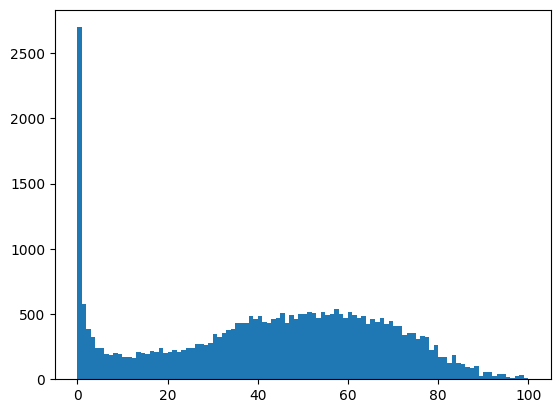

In [63]:
plt.hist(data["track_popularity"], bins= 100)
print("Number of 0 values in track_popularity: ", (data["track_popularity"] == 0).sum())

c:\Users\Lili\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-1.19732826, -1.18292552, -1.16852277, -1.15412003, -1.13971728,
        -1.12531454, -1.1109118 , -1.09650905, -1.08210631, -1.06770356,
        -1.05330082, -1.03889807, -1.02449533, -1.01009258, -0.99568984,
        -0.9812871 , -0.96688435, -0.95248161, -0.93807886, -0.92367612,
        -0.90927337, -0.89487063, -0.88046788, -0.86606514, -0.8516624 ,
        -0.83725965, -0.82285691, -0.80845416, -0.79405142, -0.77964867,
        -0.76524593, -0.75084319, -0.73644044, -0.7220377 , -0.70763495,
        -0.69323221, -0.67882946, -0.66

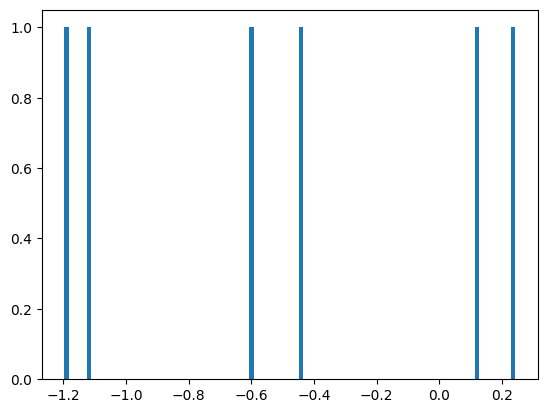

In [58]:
even = np.log(data["loudness"])
plt.hist(even, bins= 100)
#log transform makes no sense, because the data is not that skew

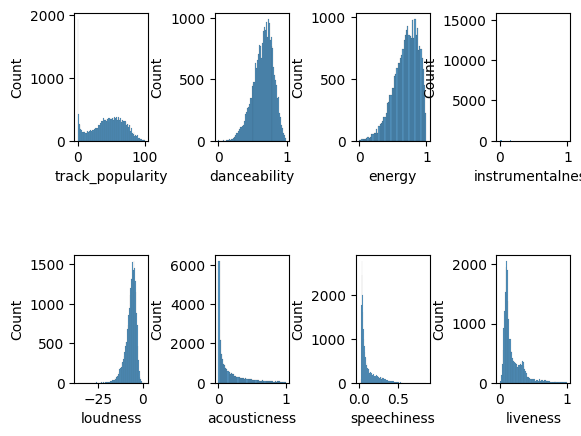

In [70]:
X_train["track_popularity"].max()
fig = plt.figure()
fig.subplots_adjust(hspace=0.9, wspace=0.9)
ax = fig.add_subplot(2, 4, 1)
sns.histplot(X_train["track_popularity"], bins = 100, ax=ax)
ax = fig.add_subplot(2, 4, 2)
sns.histplot(X_train["danceability"], ax=ax)
ax = fig.add_subplot(2, 4, 3)
sns.histplot(X_train["energy"],ax=ax)
ax = fig.add_subplot(2, 4, 4)
sns.histplot(X_train["instrumentalness"],ax=ax)
ax = fig.add_subplot(2, 4, 5)
sns.histplot(X_train["loudness"], bins = 100,ax=ax)
ax = fig.add_subplot(2, 4, 6)
sns.histplot(X_train["acousticness"], ax=ax)
ax = fig.add_subplot(2, 4, 7)
sns.histplot(X_train["speechiness"],ax=ax)
ax = fig.add_subplot(2, 4, 8)
sns.histplot(X_train["liveness"],ax=ax)
plt.show()

In [ ]:
# TODO: log transform the not even distributed variables??
#compare the results
#scale loudness


c:\Users\Lili\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


9123

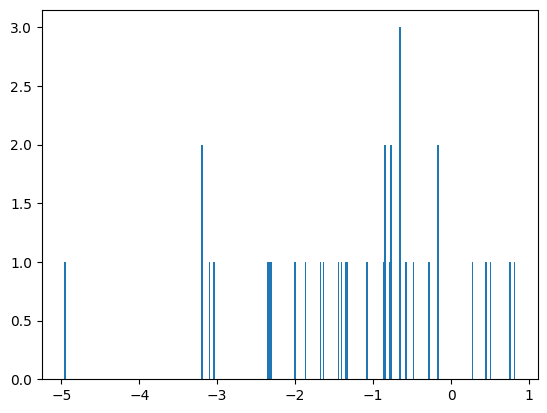

In [83]:
plt.hist(np.log1p(X_train['loudness']), bins= 300)
X_train["loudness"].nunique()


In [ ]:
#TODO: function to build the neual network

In [ ]:
#find the optimal values for gridsearch


In [ ]:
#TODO: cross validation

In [ ]:
#TODO: look for solutions